#              **Milestone 2**
# Biodiversity in US National Parks Dataset ##


## Before proceeding with the analysis we need to import few packages into python

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

**1. Start by uploading the dataset as a dataframe in pandsas**


In [2]:
df = pd.read_csv("parks.csv")

In [13]:
#to check the very first top section of your dataframe, you can use the .head() function
df.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


**2. Upload the second dataset as a dataframe in pandas, and this time assign a different name**

In [5]:
df2 = pd.read_csv("species.csv", low_memory=False)

In [7]:
df2.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


**3. Take a closer look into your data, and pay attention to each dataframe column values**

In [9]:
df.describe(exclude=[np.number])

,Park Code,Park Name,State
count,56,56,56
unique,56,56,27
top,BIBE,Black Canyon of the Gunnison National Park,AK
freq,1,1,8


In [10]:
df.describe(include=[np.number])

,Acres,Latitude,Longitude
count,5.600000e+01,56.000000,56.000000
mean,9.279291e+05,41.233929,-113.234821
std,1.709258e+06,10.908831,22.440287
min,5.550000e+03,19.380000,-159.280000
25%,6.901050e+04,35.527500,-121.570000
50%,2.387645e+05,38.550000,-110.985000
75%,8.173602e+05,46.880000,-103.400000
max,8.323148e+06,67.780000,-68.210000


In [11]:
df2.describe(exclude=[np.number])

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
count,119248,119248,119248,117776,117736,119248,119248,119248,99106,94203,76306,20157,4718,5
unique,119248,56,14,554,2332,46022,35826,54,7,5,8,24,11,3
top,REDW-4954,Great Smoky Mountains National Park,Vascular Plant,Poales,Asteraceae,Falco peregrinus,None,Approved,Present,Native,Unknown,Breeder,Species of Concern,Threatened
freq,1,6623,65221,11453,8843,56,27147,86254,83278,75950,28119,12214,3843,2


## Define research questions:

**After taking a quick look at the data and without any datawrangling, basic research questions can be defined:**
*  Which particular species can be considered as a dominant species in all 56 National Parks in the US?
*  Which type of species is considered as an endagered species?
*  Are there particular Fungi species that are common to all national parks? and can you trust the data based on scientific evidence?


## Exploring the datasets:

**If we plot the count of each species category in all National parks we can observe the following:**

*The category of Vascular plants is considered as the most abundant, but we still don't know which species of vascular plant is actually the most abundant. Further data analysis will be required to answer this question*


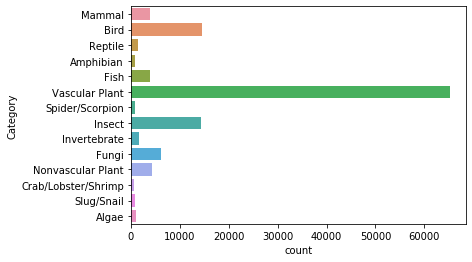

In [16]:
plot1_data2=sns.countplot(y="Category",data=df2)

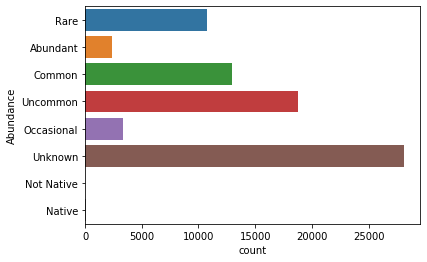

In [17]:
plot2_data2=sns.countplot(y="Abundance",data=df2)

*If we try to pick specific categories we may see the real difference in the count of species belonging to those categories*

In [47]:
category = ['Mammal','Bird','Vascular Plant']
df2_modified = df2.loc[df2['Category'].isin(category)]
df2_modified.head(100)

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN
5,ACAD-1005,Acadia National Park,Mammal,Carnivora,Felidae,Lynx canadensis,Canada Lynx,Approved,Not Confirmed,Native,NaN,NaN,NaN,NaN
6,ACAD-1006,Acadia National Park,Mammal,Carnivora,Felidae,Lynx rufus,"Bay Lynx, Bobcat, Red Lynx, Wild Cat",Approved,Not Present (Historical Report),Not Native,NaN,Vagrant,NaN,NaN
7,ACAD-1007,Acadia National Park,Mammal,Carnivora,Mephitidae,Mephitis mephitis,"Eastern Skunk, Polecat, Striped Skunk",Approved,Not Present (Historical Report),Native,NaN,NaN,NaN,NaN
8,ACAD-1008,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,Common,Breeder,NaN,NaN
9,ACAD-1009,Acadia National Park,Mammal,Carnivora,Mustelidae,Martes pennanti,"Blackcat, Fisher, Pekan",Approved,Present,Native,Rare,NaN,NaN,NaN


AttributeError: module 'matplotlib.pylab' has no attribute 'ticker'

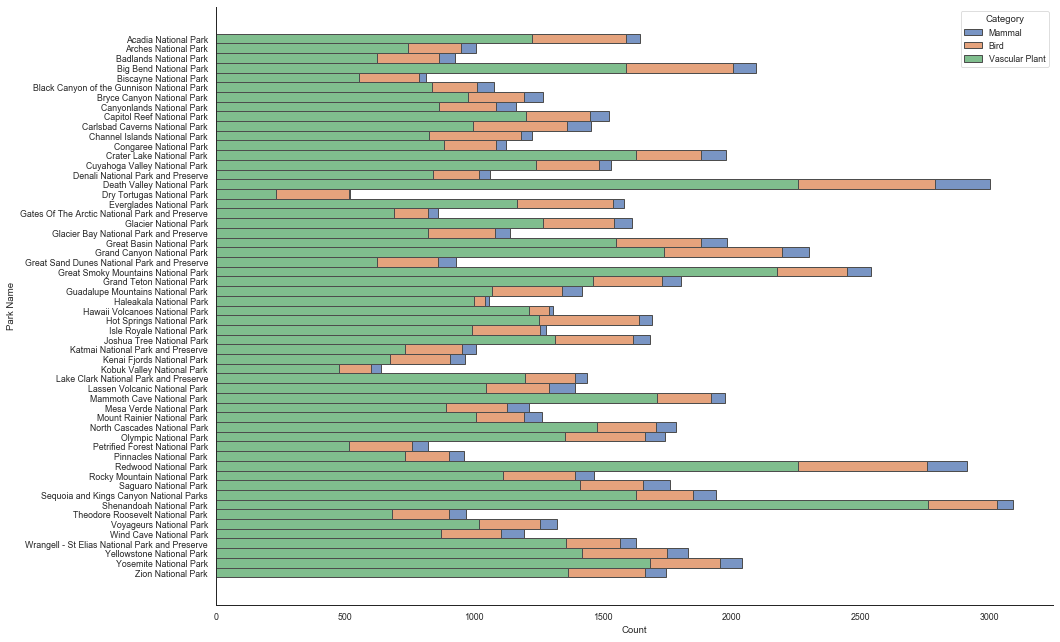

In [72]:
#sns.set_theme(style="ticks")
sns.set_theme(context='paper',
              style='white', 
              palette='pastel', 
              font='sans-serif', 
              font_scale=1, 
              color_codes=True, 
              rc=None)

f, ax = plt.subplots(figsize=(15, 11))
sns.despine(f)

sns.histplot(
    df2_modified,
    y="Park Name", hue="Category",
    multiple="stack",
    palette="deep",
    edgecolor=".3",
    linewidth=1,
)
ax.xaxis.set_major_formatter(plt.ticker.ScalarFormatter())

AttributeError: module 'matplotlib.pylab' has no attribute 'ticker'

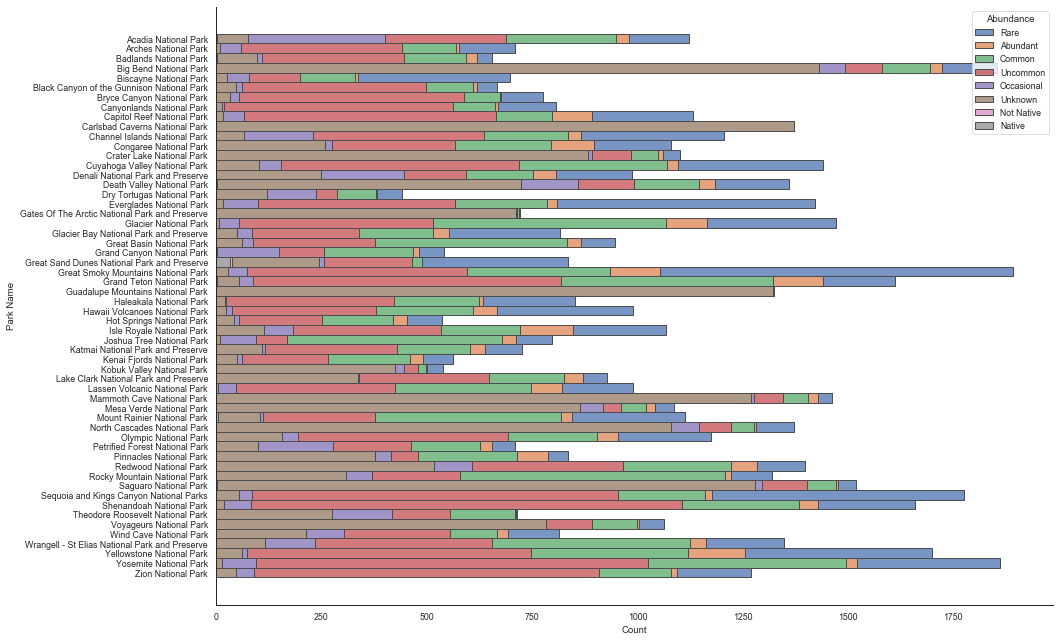

In [76]:
sns.set_theme(context='paper', 
              style='white', 
              palette='pastel', 
              font='sans-serif', 
              font_scale=1, 
              color_codes=True, 
              rc=None)

f, ax = plt.subplots(figsize=(15, 11))

sns.despine(f)

sns.histplot(
    df2_modified,
    y="Park Name", hue="Abundance",
    multiple="stack",
    palette="deep",
    edgecolor=".3",
    linewidth=1,
)
ax.xaxis.set_major_formatter(plt.ticker.ScalarFormatter())


In [77]:
category = ['Mammal']
mammalians = df2.loc[df2['Category'].isin(category)]
mammalians.head(100)

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN
5,ACAD-1005,Acadia National Park,Mammal,Carnivora,Felidae,Lynx canadensis,Canada Lynx,Approved,Not Confirmed,Native,NaN,NaN,NaN,NaN
6,ACAD-1006,Acadia National Park,Mammal,Carnivora,Felidae,Lynx rufus,"Bay Lynx, Bobcat, Red Lynx, Wild Cat",Approved,Not Present (Historical Report),Not Native,NaN,Vagrant,NaN,NaN
7,ACAD-1007,Acadia National Park,Mammal,Carnivora,Mephitidae,Mephitis mephitis,"Eastern Skunk, Polecat, Striped Skunk",Approved,Not Present (Historical Report),Native,NaN,NaN,NaN,NaN
8,ACAD-1008,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,Common,Breeder,NaN,NaN
9,ACAD-1009,Acadia National Park,Mammal,Carnivora,Mustelidae,Martes pennanti,"Blackcat, Fisher, Pekan",Approved,Present,Native,Rare,NaN,NaN,NaN


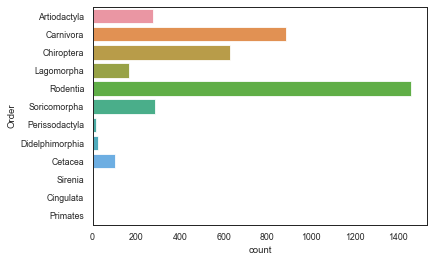

In [78]:
mammalian_plot=sns.countplot(y="Order",data=mammalians)

AttributeError: module 'matplotlib.pylab' has no attribute 'ticker'

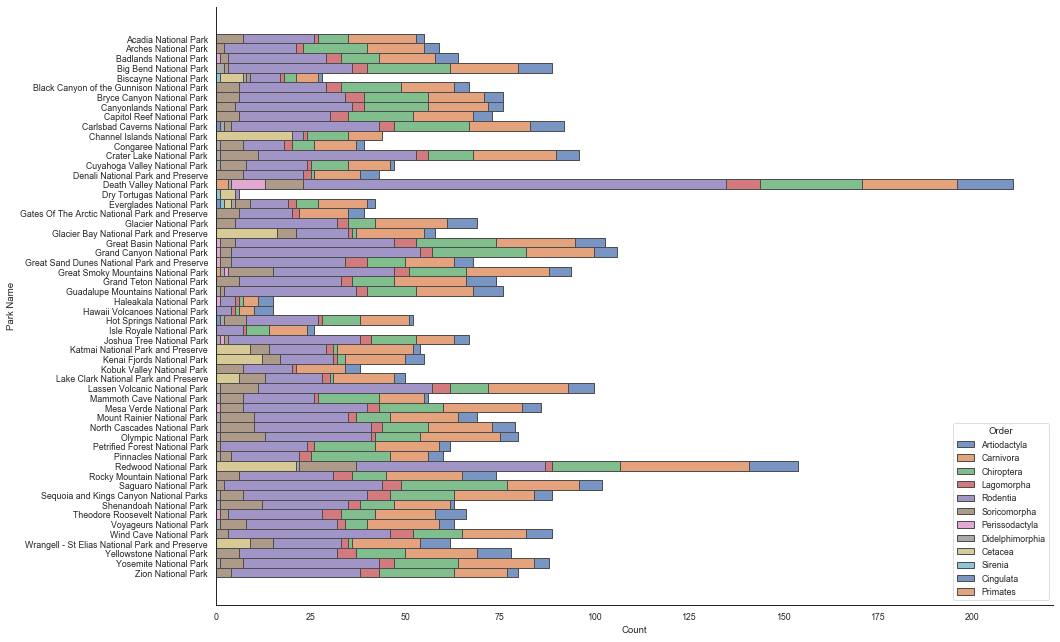

In [87]:
sns.set_theme(context='paper',
              style='white', 
              palette='Blues_d', 
              font='sans-serif', 
              font_scale=1, 
              color_codes=True, 
              rc=None)

f, ax = plt.subplots(figsize=(15, 11))
sns.despine(f)

sns.histplot(
    mammalians,
    y="Park Name", hue="Order",
    multiple="stack",
    palette="deep",
    edgecolor=".3",
    linewidth=1,
)
ax.xaxis.set_major_formatter(plt.ticker.ScalarFormatter())